In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1712,ham,o turns out i had stereo love on mi phone unde...,NaN,NaN,NaN
497,ham,Some of them told accenture is not confirm. Is...,NaN,NaN,NaN
1436,ham,I jus hope its true that missin me cos i'm re...,NaN,NaN,NaN
2920,ham,"Yo, any way we could pick something up tonight?",NaN,NaN,NaN
4063,ham,Prof: you have passed in all the papers in thi...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

### 1. Data cleaning
### 2. EDA
### 3. Text preprocessing
### 4. Model Building
### 5. Evaluation 
### 6. Improvement
### 7. website

## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last three columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [7]:
df.sample(5)

,v1,v2
933,ham,What time you think you'll have it? Need to kn...
2834,ham,"Ya they are well and fine., BBD(pooja) full pi..."
4626,spam,Please call our customer service representativ...
3384,ham,Ok can...
684,ham,I wanted to ask Ì_ to wait 4 me to finish lect...


In [8]:
# renaming the cols
df.rename(columns={'v1' : 'target', 'v2' : 'text'}, inplace=True)
df.sample(5)

,target,text
4302,ham,Yup i'm free...
1298,ham,Your daily text from me ÛÒ a favour this time
2033,ham,IM GONNA MISS U SO MUCH
1035,ham,"Hello baby, did you get back to your mom's ? A..."
3975,ham,I wish u were here. I feel so alone


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
## missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
## check for duplicate values
df.duplicated().sum()

403

In [14]:
df= df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

## EDA

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

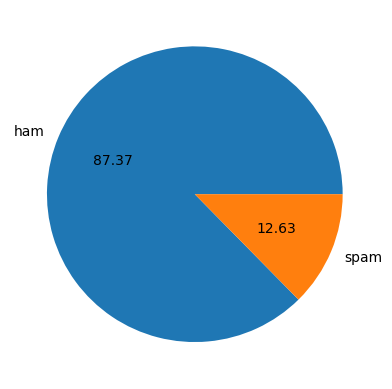

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [20]:
# data is imbalanced

In [21]:
!pip install nltk

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
#len gives the length of characters of each field
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [25]:
df['num_characters'] = df['text'].apply(len)

In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
# now we fetch the number of characters and for this we will break each sms into different words
# number of words
df['text'].apply(lambda x:nltk.word_tokenize(x))


0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [28]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()
# we got another column in the table now

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()
#now we can see new features added in our table for analysis

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
# this is for ham messages
df[df['target'] == 0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
# this is for spam messages, we can see that spam messages are relatively larger
df[df['target'] == 1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [35]:
import seaborn as sns

In [36]:
pip install --upgrade seaborn


In [37]:
import numpy as np
import pandas as pd

# Assuming 'df' is your DataFrame
df.replace([np.inf, -np.inf], np.nan, inplace=True)


<Axes: xlabel='num_characters', ylabel='Count'>

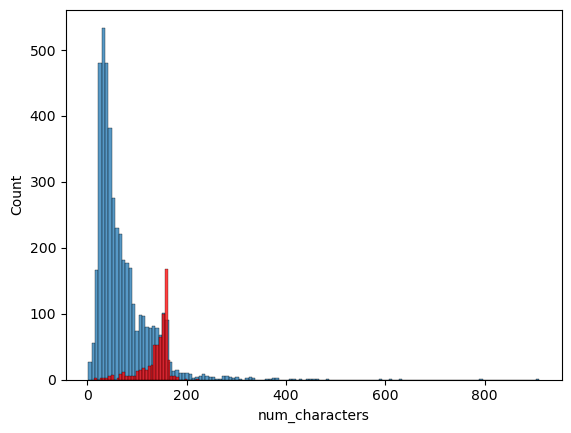

In [38]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

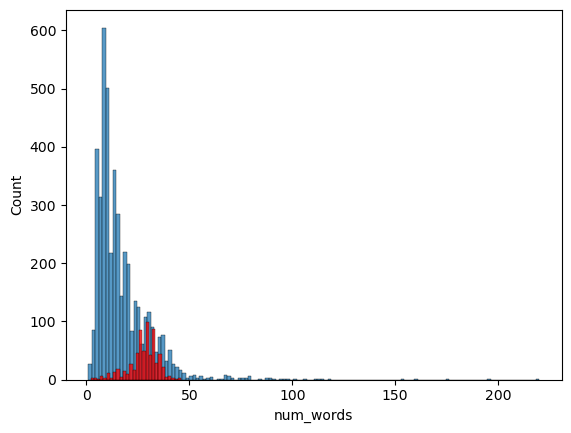

In [39]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

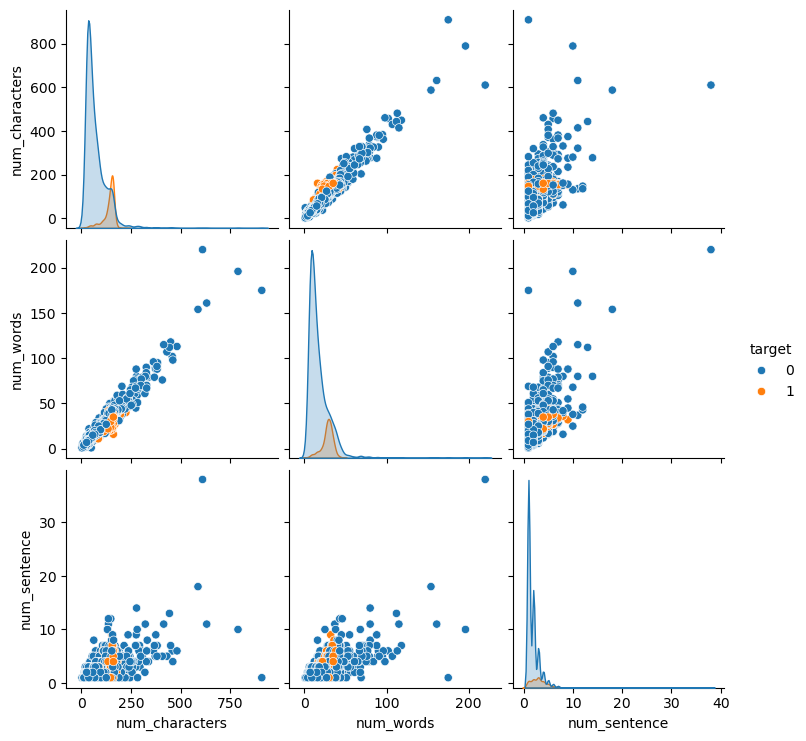

In [40]:
sns.pairplot(df,hue='target')
# here we can see outliers

<Axes: >

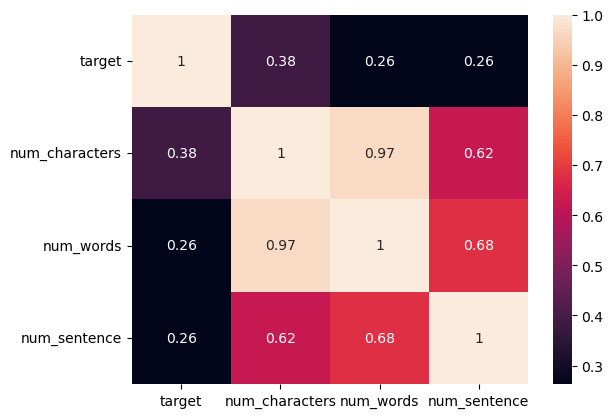

In [41]:
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Now calculate the correlation matrix and plot it
sns.heatmap(numeric_df.corr(), annot=True)


### Data preprocessing
    1. lower case
    2. Tokenization
    3. Removing special characters
    4. Removing stop words and punctuation
    5. stemming or lemetization

In [42]:
def transform_text(text):
    text = text.lower()  #converting the text into lowercase
    text = nltk.word_tokenize(text) #breaking the text into different words

    y= []
    for i in text:
        if i.isalnum():
            y.append(i)

    #we do not copy list like this :text = y instead
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [48]:
import string
from nltk.corpus import stopwords

# You might need to download the stopwords dataset if you haven't already
import nltk
nltk.download('stopwords')

def transform_text(text):
    # Initialize an empty list to hold the processed text
    y = []

    # Iterate over each word in the input text
    for i in text.split():
        # If the word is not a stopword and not punctuation, add it to the list
        if i.lower() not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    # Join the list into a single string of processed text
    return ' '.join(y)

# Example usage:
result = transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')
print(result)


Go jurong point, crazy.. Available bugis n great world la e buffet... Cine got amore wat...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'Go jurong point, crazy.. Available bugis n great world la e buffet... Cine got amore wat...'

In [50]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [51]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [52]:
df['transformed_text'] = df['text'].apply(transform_text)

In [53]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"Go jurong point, crazy.. Available bugis n gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say early hor... U c already say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"Nah think goes usf, lives around though"


In [54]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [55]:
## now we will generate the word cloud module
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')

In [56]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

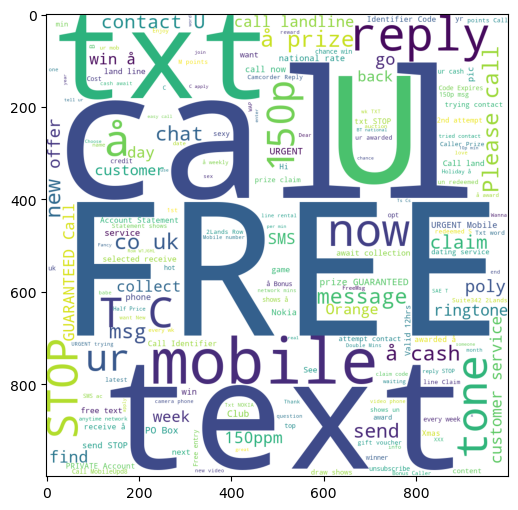

In [57]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [58]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

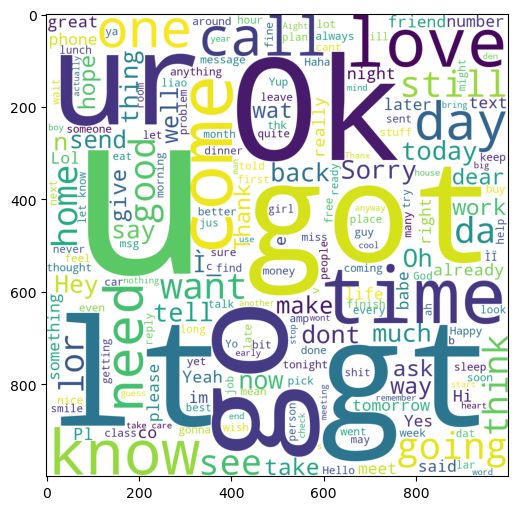

In [59]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [60]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"Go jurong point, crazy.. Available bugis n gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say early hor... U c already say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"Nah think goes usf, lives around though"


In [63]:
spam_corpus = []
for msg in df[df['target'] ==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [64]:
len(spam_corpus)

11075

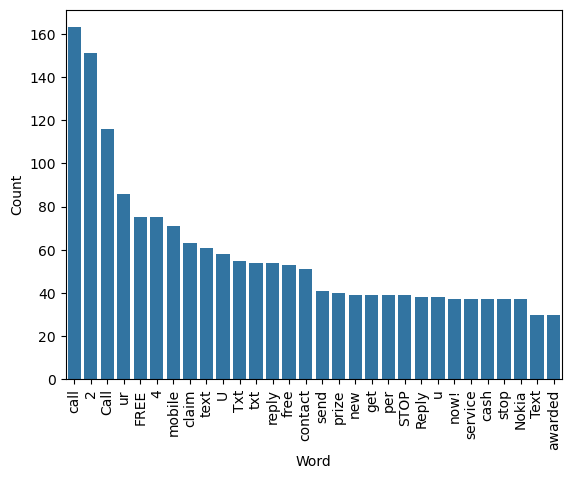

In [65]:
from collections import Counter
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Count the most common words in the spam corpus
spam_counts = Counter(spam_corpus).most_common(30)

# Convert the counts into a DataFrame
df_spam = pd.DataFrame(spam_counts, columns=['Word', 'Count'])

# Plot the data using seaborn
sns.barplot(x='Word', y='Count', data=df_spam)

# Rotate the x-axis labels for better readability
plt.xticks(rotation='vertical')

# Display the plot
plt.show()


## we are doing all this just to enhance the interpretability of the model otherwise the model would have been prepared even without the use of any of these steps


In [66]:

ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [67]:
len(ham_corpus)

38351

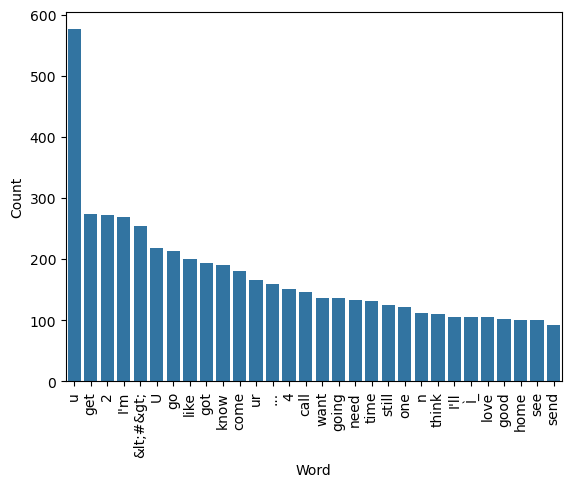

In [68]:

# Count the most common words in the spam corpus
ham_counts = Counter(ham_corpus).most_common(30)

# Convert the counts into a DataFrame
df_ham = pd.DataFrame(ham_counts, columns=['Word', 'Count'])

# Plot the data using seaborn
sns.barplot(x='Word', y='Count', data=df_ham)

# Rotate the x-axis labels for better readability
plt.xticks(rotation='vertical')

# Display the plot
plt.show()


In [69]:
# Text vectorization 
# using bag of words
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"Go jurong point, crazy.. Available bugis n gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say early hor... U c already say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"Nah think goes usf, lives around though"


### Model Building
we'll use naive bayes algorithm primarily because it works best for the textual data 
along with that we will use some other algorithms as well

In [114]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Instantiate the vectorizers
tfidf = TfidfVectorizer(max_features=3000)
cv = CountVectorizer()


In [115]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [170]:
'''from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)'''

'from sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\nx = scaler.fit_transform(x)'

In [171]:
# appending the num_character col to X
#x = np.hstack((x,df['num_characters'].values.reshape(-1,1)))

In [172]:
x.shape

(5169, 3001)

In [173]:
y = df['target'].values

In [174]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2,random_state=2)

In [177]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [178]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB

In [179]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9177949709864603
[[821  75]
 [ 10 128]]
0.6305418719211823


In [180]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9825918762088974
[[892   4]
 [ 14 124]]
0.96875


In [181]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

# Assuming x_train and y_train are your training data and labels respectively
bnb = BernoulliNB()

# Fit the model with the training data
bnb.fit(x_train, y_train)

# Predict on the test set
y_pred3 = bnb.predict(x_test)

# Calculate the accuracy score
print(accuracy_score(y_test, y_pred3))


0.9874274661508704


In [182]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9874274661508704
[[896   0]
 [ 13 125]]
1.0


In [183]:
# since precision comes best in multinomial naive bayes therefor we will choose mnb
# tfidf -->MNB

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [185]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [186]:

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [187]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [188]:
train_classifier(svc,x_train,y_train,x_test,y_test)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8665377176015474, 0.0)

In [189]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  SVC
Accuracy -  0.8665377176015474
Precision -  0.0
For  KN
Accuracy -  0.879110251450677
Precision -  1.0
For  NB
Accuracy -  0.9825918762088974
Precision -  0.96875
For  DT
Accuracy -  0.9468085106382979
Precision -  0.8807339449541285
For  LR
Accuracy -  0.97678916827853
Precision -  0.9830508474576272
For  RF
Accuracy -  0.97678916827853
Precision -  1.0
For  AdaBoost
Accuracy -  0.9738878143133463
Precision -  0.944
For  BgC
Accuracy -  0.9709864603481625
Precision -  0.9576271186440678
For  ETC
Accuracy -  0.9816247582205029
Precision -  0.983739837398374
For  GBDT
Accuracy -  0.9574468085106383
Precision -  0.9519230769230769
For  xgb
Accuracy -  0.9738878143133463
Precision -  0.9663865546218487


In [190]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [191]:
performance_df



,Algorithm,Accuracy,Precision
1,KN,0.879110,1.000000
5,RF,0.976789,1.000000
8,ETC,0.981625,0.983740
4,LR,0.976789,0.983051
2,NB,0.982592,0.968750
10,xgb,0.973888,0.966387
7,BgC,0.970986,0.957627
9,GBDT,0.957447,0.951923
6,AdaBoost,0.973888,0.944000
3,DT,0.946809,0.880734


In [192]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [193]:
performance_df1


,Algorithm,variable,value
0,KN,Accuracy,0.879110
1,RF,Accuracy,0.976789
2,ETC,Accuracy,0.981625
3,LR,Accuracy,0.976789
4,NB,Accuracy,0.982592
5,xgb,Accuracy,0.973888
6,BgC,Accuracy,0.970986
7,GBDT,Accuracy,0.957447
8,AdaBoost,Accuracy,0.973888
9,DT,Accuracy,0.946809


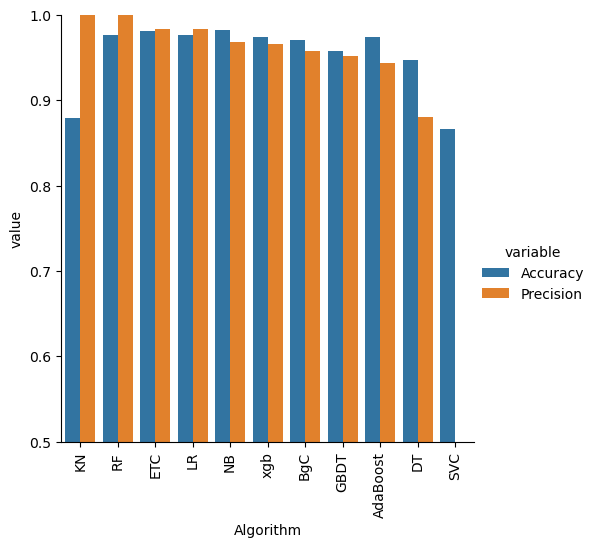

In [194]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()


## Model Improvement

In [195]:
# change the max_feature  

In [196]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [197]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [198]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [199]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [200]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [201]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.879110,1.000000,0.879110,1.000000,0.879110,1.000000,0.879110,1.000000
1,RF,0.976789,1.000000,0.976789,1.000000,0.976789,1.000000,0.976789,1.000000
2,ETC,0.981625,0.983740,0.981625,0.983740,0.981625,0.983740,0.981625,0.983740
3,LR,0.976789,0.983051,0.976789,0.983051,0.976789,0.983051,0.976789,0.983051
4,NB,0.982592,0.968750,0.982592,0.968750,0.982592,0.968750,0.982592,0.968750
5,xgb,0.973888,0.966387,0.973888,0.966387,0.973888,0.966387,0.973888,0.966387
6,BgC,0.970986,0.957627,0.970986,0.957627,0.970986,0.957627,0.970986,0.957627
7,GBDT,0.957447,0.951923,0.957447,0.951923,0.957447,0.951923,0.957447,0.951923
8,AdaBoost,0.973888,0.944000,0.973888,0.944000,0.973888,0.944000,0.973888,0.944000
9,DT,0.946809,0.880734,0.946809,0.880734,0.946809,0.880734,0.946809,0.880734


In [202]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [203]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [204]:
voting.fit(x_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [205]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 1.0


In [206]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [207]:
from sklearn.ensemble import StackingClassifier



In [208]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [209]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9854932301740812
Precision 0.9694656488549618


In [210]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))